In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from dist_prob_plotgraphs import plot_binom

mean: 40.0, var: 24.0, skew: 0.0408248290463863, kurt: -0.01833333333333334


(<Figure size 640x480 with 1 Axes>, <Axes: >)

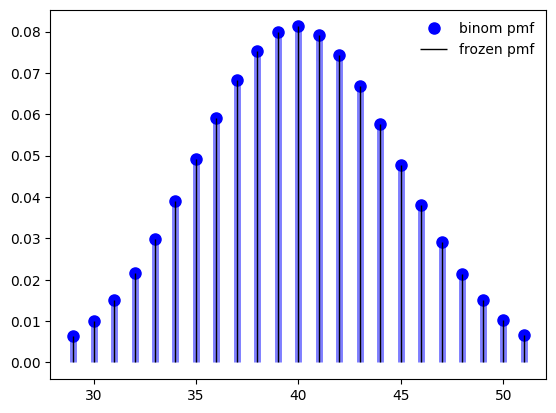

In [14]:
# crea una distribución binomial con una muestra de tamaño 100 y una proporción del 40%
n=100
p=0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# imprime sus estadísticos
print(f"mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# plotea la función de distribución
plot_binom(n, p)

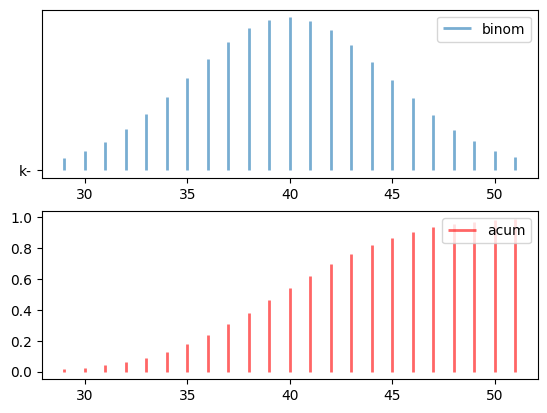

In [15]:
# Distribución Acumulada
# Genero la plantilla del grafico
fig, (ax1, ax2) = plt.subplots(2, 1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
# Dibujo la distribución normal
ax1.vlines(x, binom.pmf(x,n,p), 'k-', lw=2, alpha=0.6, label='binom')
ax2.vlines(x, binom.cdf(x,n,p), ymax=0, colors='r', lw=2, alpha=0.6, label='acum')

# Activar las leyendas
ax1.legend()
ax2.legend()

plt.show()

## Intervalo de confianza

(<Figure size 640x480 with 1 Axes>, <Axes: >)

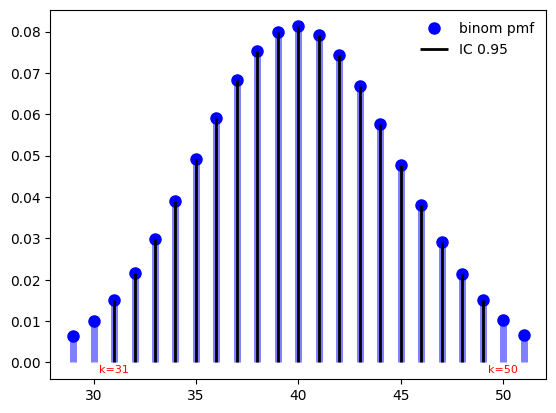

In [16]:
# Grafica la función indicando un nivel de confianza del 95%
# n: tamaño muestra 100, p: proporción 0.4, alfa: nivel de significancia 5%  (1-nivel de confianza)
# tipo: IC indica intervalo de confianza
n, p, alfa, tipo = 100, 0.4, 0.05, 'IC'
plot_binom(n, p, alfa, tipo)

## Nivel de significancia alfa
1. Alfa bilateral (opuesto a nivel de signigicancia)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

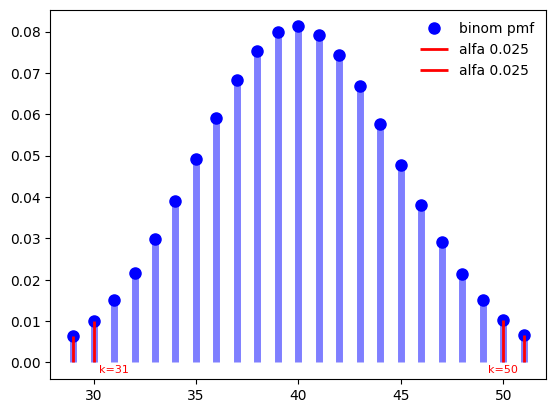

In [17]:
# Grafica la función indicando un nivel de Significancia alfa del 5% bilateral
# n: tamaño muestra 100, p: proporción 0.4, alfa: nivel de significancia 5%  (1-nivel de confianza)
# tipo: 'both' indica alfa/2 (bilateral)
n, p, alfa, tipo = 100, 0.4, 0.05, 'both'
plot_binom(n, p, alfa, tipo)

2. Alfa unilateral izquierda y 3. Alfa unilateral derecha

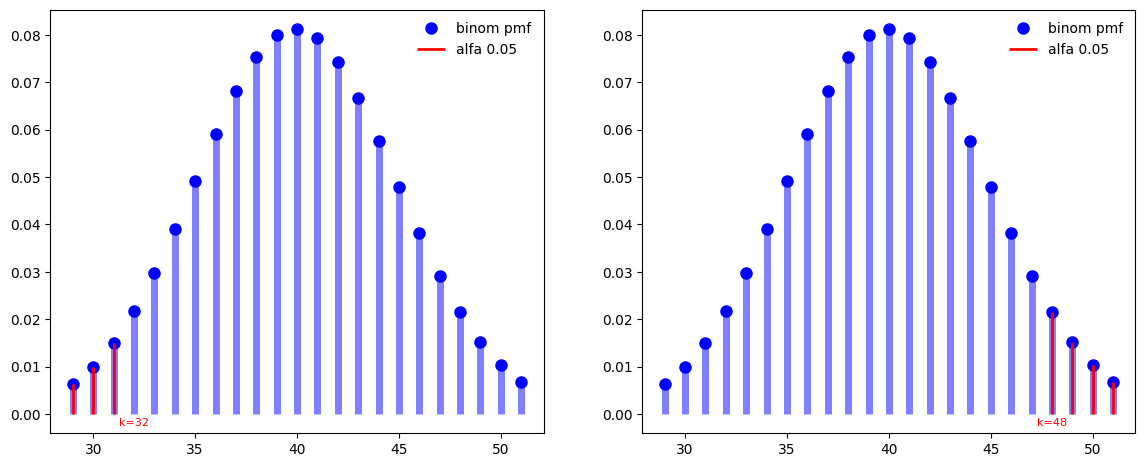

In [18]:
# Grafica la función indicando un nivel de Significancia alfa del 5% bilateral
# n: tamaño muestra 100, p: proporción 0.4, alfa: nivel de significancia 5%  (1-nivel de confianza)
# tipo: 'left' y 'right'
n, p, alfa = 100, 0.4, 0.05
# Crear una figura con dos subplots en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))
fig, ax1 = plot_binom(n, p, alfa, tipo='left', ax=ax1)
fig, ax2 = plot_binom(n, p, alfa, tipo= 'right', ax=ax2)
plt.show(fig)

## Potencia de una Prueba de Hipótesis
+ Suponga que tenemos la hipótesis nula, la hipótesis alternativa, el nivel de significancia y los datos muestrales siguientes
    + H0: p = 0.5 
    + H1: p > 0.5.      
    + Nivel de significancia: alfa = 0.05
    + Tamaño muestral: n = 100
    + Proporción muestral: pˆ = 0.57

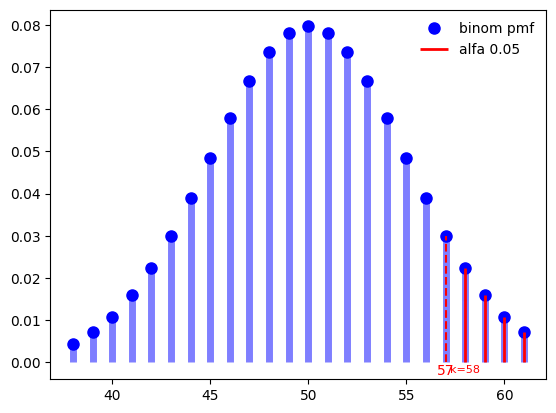

In [37]:
# H0 = 0.5, H1 <> 0.5, alfa = 5%, bilateral
# n = 100, o = 50/100, p_hat = 57/100

# Seteo de variables
n, p, alfa, tipo = 100, 0.5, 0.05, 'right'

# Dibujar la distribución y las zonas críticas
fig, ax = plot_binom(n, p, alfa, tipo)

# Dibujar las líneas punteadas en pmf(H1)
p_hat = 57
ax.plot([p_hat, p_hat], [0, binom(n, p).pmf(p_hat)], linestyle="dashed", color='r')
ax.text(p_hat, -0.002, f"{p_hat}", ha='center', va='center', fontsize=10, color='red')
plt.show()

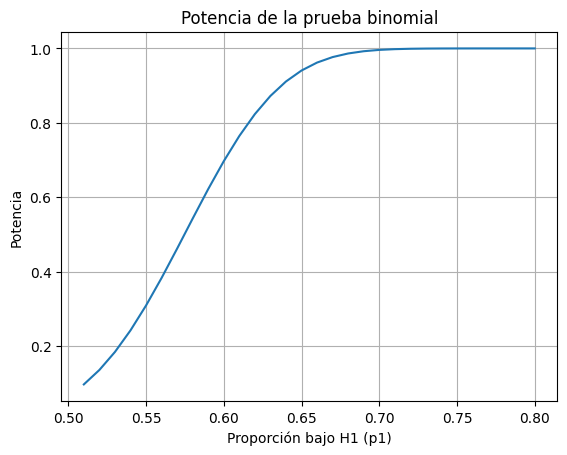

In [40]:
# Potencia: es la capacidad de una prueba para detectar un efecto cuando ese efecto realmente existe.
# La fórmula para calcular la potencia de una prueba binomial unilateral a la derecha se puede expresar como: Potencia = 1 - P(X <= c | p = p1)
# Donde:
# X es una variable aleatoria binomial.
# c es el valor crítico.
# p1 es la proporción bajo la hipótesis alternativa.
# P(X <= c | p = p1) es la probabilidad de que X sea menor o igual a c dado que la proporción verdadera es p1.

from scipy.stats import binom

def potencia_binomial(n, p0, p1, alpha):
    """
    Calcula la potencia de una prueba binomial. Unilateral Derecha.
    Potencia: es la capacidad de una prueba para detectar un efecto cuando ese efecto realmente existe.
    Fórmula para calcular la potencia de una prueba binomial unilateral a la derecha se puede expresar como: Potencia = 1 - P(X <= c | p = p1)
    Donde:
    X : variable aleatoria binomial.
    c : el valor crítico.
    p1: es la proporción bajo la hipótesis alternativa.
    P(X <= c | p = p1) es la probabilidad de que X sea menor o igual a c dado que la proporción verdadera es p1.

    Args:
        n: Tamaño de la muestra.
        p0: Proporción bajo la hipótesis nula.
        p1: Proporción bajo la hipótesis alternativa.
        alpha: Nivel de significancia.

    Returns:
        float: Potencia de la prueba.
    """

    # Valor crítico (unilateral a la derecha)
    critical_value = binom.ppf(1 - alpha, n, p0)

    # Probabilidad de obtener un valor igual o mayor al crítico bajo H1
    power = 1 - binom.cdf(critical_value - 1, n, p1)

    return power

# Parámetros
n = 100
p0 = 0.5
alpha = 0.05

# Rango de valores para p1
p1_values = np.linspace(0.51, 0.8, 30)
potencias = [potencia_binomial(n, p0, p1, alpha) for p1 in p1_values]

# Gráfico
plt.plot(p1_values, potencias)
plt.xlabel('Proporción bajo H1 (p1)')
plt.ylabel('Potencia')
plt.title('Potencia de la prueba binomial')
plt.grid(True)
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (30, 10) and arg 2 with shape (10, 30).

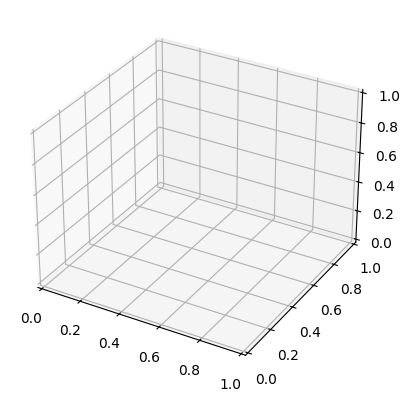

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import binom

def potencia_binomial(n, p0, p1, alpha):
    """
    Calcula la potencia de una prueba binomial.

    Args:
        n: Tamaño de la muestra.
        p0: Proporción bajo la hipótesis nula.
        p1: Proporción bajo la hipótesis alternativa.
        alpha: Nivel de significancia.

    Returns:
        float: Potencia de la prueba.
    """

    # Valor crítico (unilateral a la derecha)
    critical_value = binom.ppf(1 - alpha, n, p0)

    # Probabilidad de obtener un valor igual o mayor al crítico bajo H1
    power = 1 - binom.cdf(critical_value - 1, n, p1)

    return power

# Parámetros
p0 = 0.5
alpha = 0.05

# Rangos de valores
n_values = np.linspace(20, 200, 10)
p1_values = np.linspace(0.51, 0.8, 30)

# Crear una malla de valores para n y p1
X, Y = np.meshgrid(n_values, p1_values)

# Calcular la potencia para cada combinación de n y p1
Z = np.array([[potencia_binomial(int(n), p0, p1, alpha) for p1 in p1_values] for n in n_values])

# Crear el gráfico de superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Etiquetas y título
ax.set_xlabel('Tamaño de muestra (n)')
ax.set_ylabel('Proporción bajo H1 (p1)')
ax.set_zlabel('Potencia')
ax.set_title('Potencia de la prueba binomial')

# Barra de color
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
